<br><br><img src="https://hub.packtpub.com/wp-content/uploads/2018/03/Sentiment-Analysis-Tw.png">

# <font color='brown'> Sentiment Analysis : Twitter US Airline Sentiment</font>


*Ioanna K. Larissi*

The internet provides the vast amount of information about almost everything. Individuals have perceived the internet as an important source in which a large number of opinions and experiences are readily available. People’s evaluations
significantly influence others beliefs, perceptions, and particularly their buying decisions. Nowadays, the information flow has gradually transformed to an onlinebased aggregation of experiences, insights, and views. The steep increase of online data creates a significant opportunity for companies to understand better what customers are saying about a product, topic, or other entity.<br> In recent years, Twitter Sentiment analysis has been getting very popular for automatic customer satisfaction analysis of online services. The customer’s feedback about their services for airline companies is very essential.

**Data Description:** 


A sentiment analysis job about the problems of each major U.S. airline.<br> Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, <br>followed by categorizing negative reasons (such as "late flight" or "rude service"). 

**Dataset** 


The project is from a dataset from Kaggle.  
Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment  
The dataset has to be downloaded from the above Kaggle website. 


The dataset has the following columns: 

*	tweet_id
*	airline_sentiment
*	airline_sentiment_confidence
*	negativereason 
*	negativereason_confidence 
*	airline 
*	airline_sentiment_gold 
*	name 
*	negativereason_gold 
*	retweet_count 
*	text 
*	tweet_coord 
*	tweet_created 
*	tweet_location 
*	user_timezone

**Objective:** 


To implement the techniques learnt as a part of the course. 

**Learning Outcomes:**


*	Basic understanding of text pre-processing. 
*	What to do after text pre-processing:  
*		Bag of words 
*		Tf-idf 
*	Build the classification model. 
*	Evaluate the Model.

<img src="https://storage.ning.com/topology/rest/1.0/file/get/479651566?profile=original">

# <font color='Brown'>Task 1</font>

**Import the libraries, load dataset, print shape of data, data description**

**Import the libraries**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install mlxtend  

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install imblearn

In [6]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re, string, unicodedata
from bs4 import BeautifulSoup


import nltk
import contractions

nltk.download('wordnet')
nltk.download('punkt')

from nltk.tokenize import word_tokenize 
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix

from imblearn.over_sampling import SMOTE


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Load dataset**

In [8]:
# Load the dataset
tweet_data = pd.read_csv('Tweets.csv',header=0)

In [9]:
tweet_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Shape of data**

In [10]:
# There are 14640 rows and 15 columns in the tweet data
print(tweet_data.shape)

(14640, 15)


In [11]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

There are 14,640 rows and 15 columns/Features 

In [12]:
tweet_data.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [13]:
tweet_data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

We know that the sentiment has three options (positive, neutral, and negative).<br> In the previous cell, we explore their distribution and analogy in the data. <br>It is clear that the "negative" sentiment tweets dominates. <br>This maybe occur due to the nature of the passengers to easily complain when there is an issue, but do not express themselves when everything is going fine. That's why we need to further understand the data in more detail and clean and justify them as well.

**Checking if data is duplicated and removing duplicates**

In [14]:
# Check for duplicate rows
duplicateRowsDF = tweet_data[tweet_data.duplicated()]
print(duplicateRowsDF.head(36))
print(duplicateRowsDF.shape)  
# There are 36 duplicate rows

                 tweet_id airline_sentiment  airline_sentiment_confidence  \
12040  570308309682675712          negative                           1.0   
12059  570305051819941889           neutral                           1.0   
12063  570303383782989824           neutral                           1.0   
12066  570301929580048385           neutral                           1.0   
12068  570301395141836801          negative                           1.0   
12069  570300915418320897          negative                           1.0   
12074  570299252141903873          positive                           1.0   
12075  570298770136674304          negative                           1.0   
12078  570298644475346945          negative                           1.0   
12079  570298371140939776          negative                           1.0   
12086  570296996445204480          negative                           1.0   
12093  570295576446808065          negative                           1.0   

In [15]:
# Drop the duplicate rows
tweet_data.drop_duplicates(keep=False,inplace=True) 

In [16]:
# There are 14568 rows and 15 columns after dropping 36 duplicate rows from the initial load dataset
print(tweet_data.shape)

(14568, 15)


In [17]:
tweet_data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

**Description of Data**

In [18]:
tweet_data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.456800e+04,14568.000000,10484.000000,14568.000000
mean,5.692131e+17,0.899675,0.636987,0.082921
std,7.773880e+14,0.163080,0.330318,0.747520
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685551e+17,0.691975,0.360300,0.000000
50%,5.694655e+17,1.000000,0.670400,0.000000
75%,5.698859e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


**Explorotary data Analysis   EDA**

**Sentiment Analysis for each Airline**

In [19]:
#To know relation between negative reason and particular flight
tweet_data1 = tweet_data.groupby(['negativereason','airline'])
tweet_data1 = tweet_data1.airline_sentiment.value_counts()
tweet_data1.unstack()

airline_sentiment                           negative
negativereason              airline                 
Bad Flight                  American              87
                            Delta                 64
                            Southwest             90
                            US Airways           104
                            United               216
                            Virgin America        19
Can't Tell                  American             198
                            Delta                186
                            Southwest            159
                            US Airways           246
                            United               379
                            Virgin America        22
Cancelled Flight            American             238
                            Delta                 51
                            Southwest            162
                            US Airways           189
                            United               181
                            Virgin America        18
Customer Service Issue      American             756
                            Delta                199
                            Southwest            391
                            US Airways           811
                            United               681
                            Virgin America        60
Damaged Luggage             American              12
                            Delta                 11
                            Southwest             14
                            US Airways            11
                            United                22
                            Virgin America         4
Flight Attendant Complaints American              85
                            Delta                 60
                            Southwest             38
                            US Airways           123
                            United               168
                            Virgin America         5
Flight Booking Problems     American             130
                            Delta                 44
                            Southwest             61
                            US Airways           122
                            United               144
                            Virgin America        28
Late Flight                 American             239
                            Delta                269
                            Southwest            152
                            US Airways           453
                            United               525
                            Virgin America        17
Lost Luggage                American             143
                            Delta                 57
                            Southwest             90
                            US Airways           154
                            United               269
                            Virgin America         5
longlines                   American              34
                            Delta                 14
                            Southwest             29
                            US Airways            50
                            United                48
                            Virgin America         3

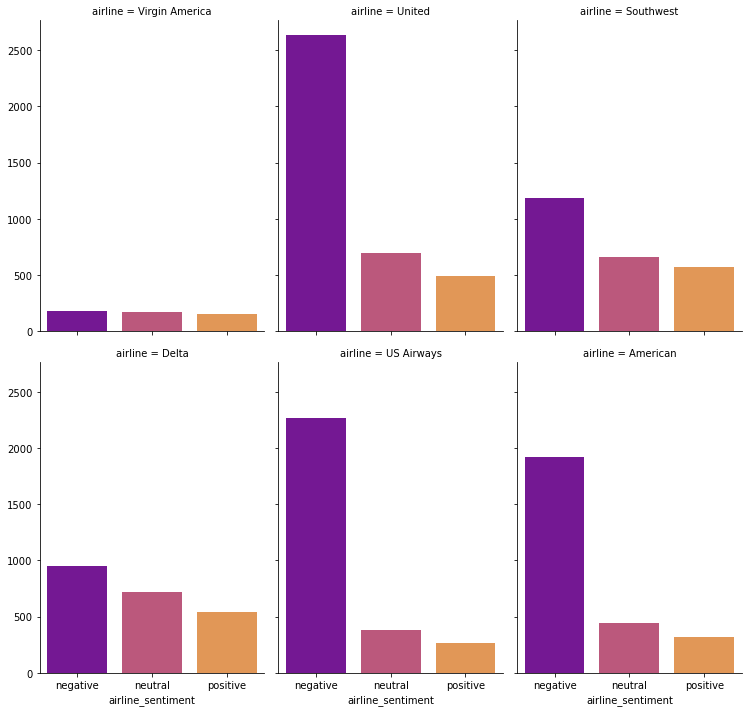

In [20]:
g = sns.FacetGrid(tweet_data, col="airline", col_wrap=3, height=5, aspect =0.7)
g = g.map(sns.countplot, "airline_sentiment",order =tweet_data.airline_sentiment.value_counts().index, palette='plasma')
plt.show()
# Here we can see that United Airlines, US Airways, American Airlines has the most number of negative review
# Virgin America has the least number of negative reviews
#Virgin America, Delta and Southwest have fairly balanced tweets

**Most Common negative review reasons**

There is a feature called "negative reason" when the sentiment is negative, and "NAN" for other sentiments. <br>Let's discover the reasons which led the passengers to give negative evaluation(tweet). <br>At the cell below, we can see the ten (10) reasons mentioned. Most of the complaints has to do with: the customer service, late flights, reason that they do want to explain "can't tell" <br>The distribution of the different reasons are shown at the ouput of the below code; sorted descending.

Note: The summation of all negative reasons (9140) equals the sum of negative sentiments (9140), so each negative sentiment has a reason; ther are no missing data.

Customer Service Issue         2898
Late Flight                    1655
Can't Tell                     1190
Cancelled Flight                839
Lost Luggage                    718
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     479
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


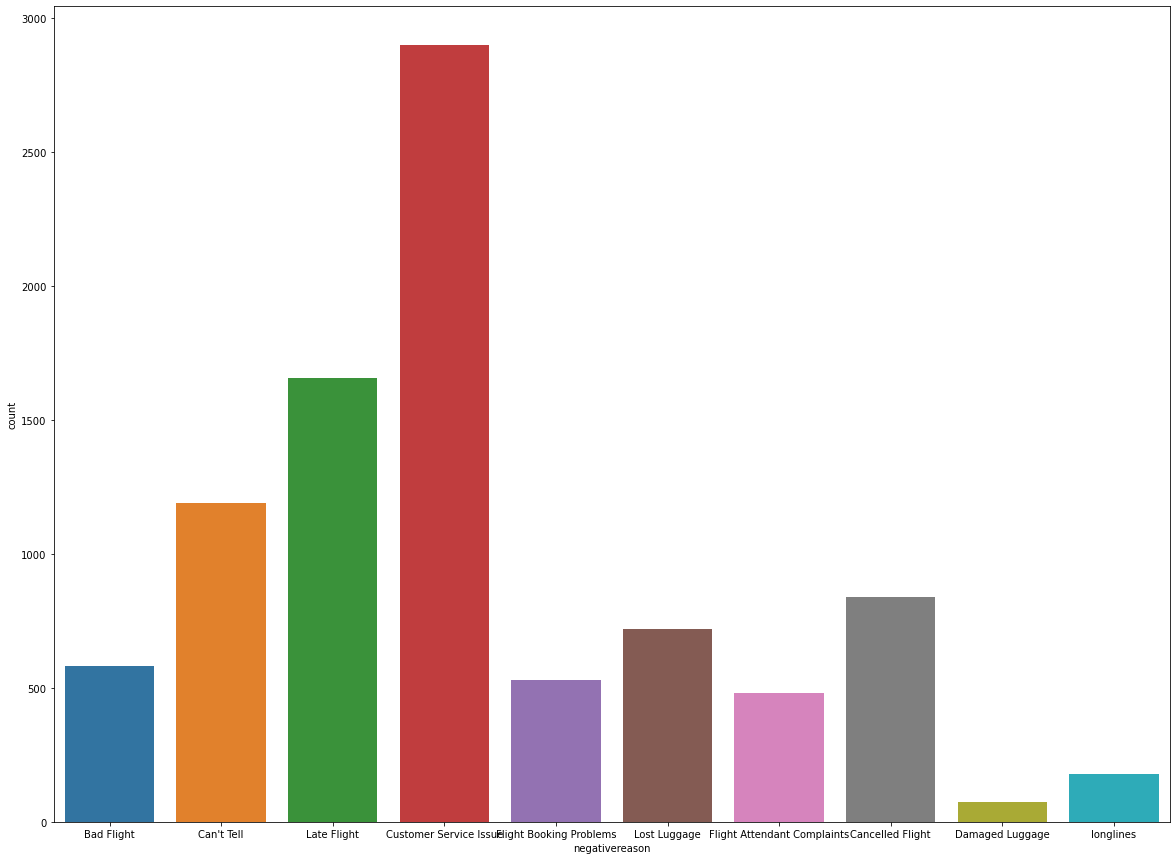

In [105]:
# Check the most common negative reason 
y = tweet_data['negativereason']
print(y.value_counts())
plt.figure(figsize=(20,15)) 
g = sns.countplot(y)
# Customer service and Late flight seems to be the main reason why customers are giving bad feedback

In [119]:
# Data balance
def createPieChartFor(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)
    
    # set data for pie chart
    labels = t_df.value_counts().index.values
    sizes =  Lst 
    
    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.show()

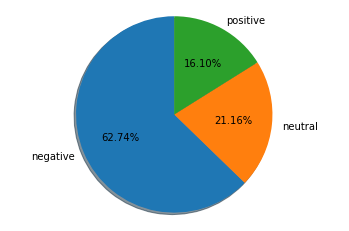

In [120]:
#from the pie below we can see that we have majority of negative comments (63%) followed by neutral (21%) and 
#positive (16%)

createPieChartFor(tweet_data.airline_sentiment)

All the tweets are for US airlines, let's break down these tweets by airline company. <br>The following cell shows that there are 6 airlines, and the number of tweets for each.

In [24]:
airline_values= tweet_data['airline'].value_counts()
print(airline_values)

United            3822
US Airways        2913
American          2687
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


Let's visualize the percentage of the tweets per company to have a more clear perception.

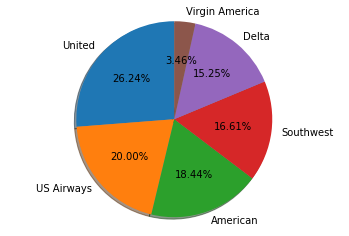

In [25]:
createPieChartFor(tweet_data.airline)

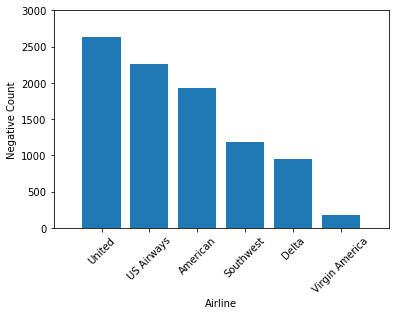

In [26]:
#plot airlines with tweets distribution
data_neg = tweet_data[tweet_data['airline_sentiment']=='negative']

x =(data_neg['airline']).value_counts().keys()
x_pos = np.arange(len(x))
y = (data_neg['airline'].value_counts()).values


barlist = plt.bar(x_pos, y, align='center')
plt.xticks(x_pos, x,rotation=45)
plt.xlabel('Airline')
plt.ylabel('Negative Count')
plt.xlim(-1,len(x) )
plt.ylim(0,3000)

plt.show()

From the figure above, it is clear that the airline with the most tweets is also the airline with the most negative tweets.

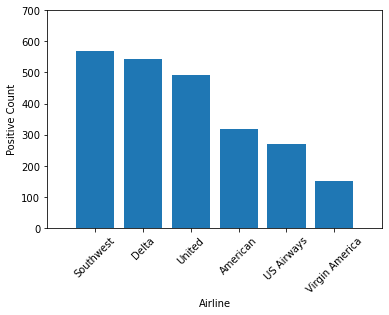

In [27]:
#plot airlines with tweets distribution
data_pos = tweet_data[tweet_data['airline_sentiment']=='positive']

x =(data_pos['airline']).value_counts().keys()
x_pos = np.arange(len(x))
y = (data_pos['airline'].value_counts()).values



barlist = plt.bar(x_pos, y, align='center')
plt.xticks(x_pos, x,rotation=45)
plt.xlabel('Airline')
plt.ylabel('Positive Count')
plt.xlim(-1,len(x) )
plt.ylim(0,700)

plt.show()

What about positive tweets for each airline?! <br>The figure above shows that not necessarilly the airline with the most negative tweets (United) has the lowest positive tweets. <br>We can see that United has also a lot of positive tweets.

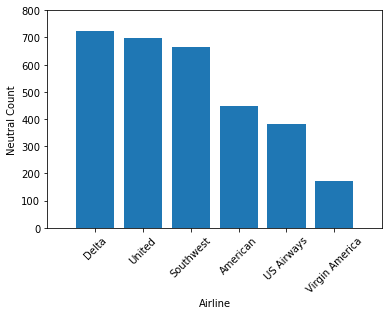

In [28]:
#plot airlines with tweets distribution
data_neut= tweet_data[tweet_data['airline_sentiment']=='neutral']

x =(data_neut['airline']).value_counts().keys()
x_pos = np.arange(len(x))
y = (data_neut['airline'].value_counts()).values



barlist = plt.bar(x_pos, y, align='center')
plt.xticks(x_pos, x,rotation=45)
plt.xlabel('Airline')
plt.ylabel('Neutral Count')
plt.xlim(-1,len(x) )
plt.ylim(0,800)

plt.show()

The figure above mainly shows that there is no direct relationship between the number of neutral tweets <br>for an airline and the number of its negative and positive tweets.

### Let's convert tweet_created to datetime and check for any insights

In [29]:
tweet_data.tweet_created= tweet_data.tweet_created.apply(pd.to_datetime).dt.date

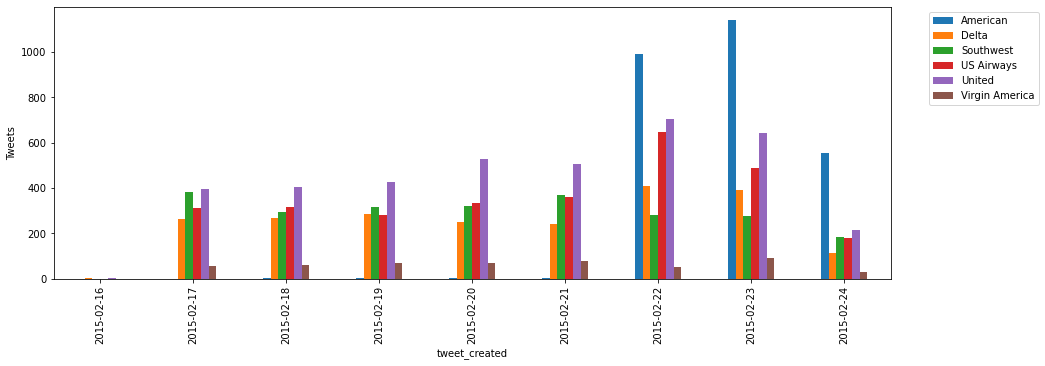

In [30]:
temp_df = tweet_data.groupby(['tweet_created','airline']).airline_sentiment.count().unstack()
ax1 = temp_df.plot(kind='bar', figsize = (15,5))
ax1.set_ylabel('Tweets')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

#### Observation: for American we have the tweets coming in from 22-02-2015 onwards

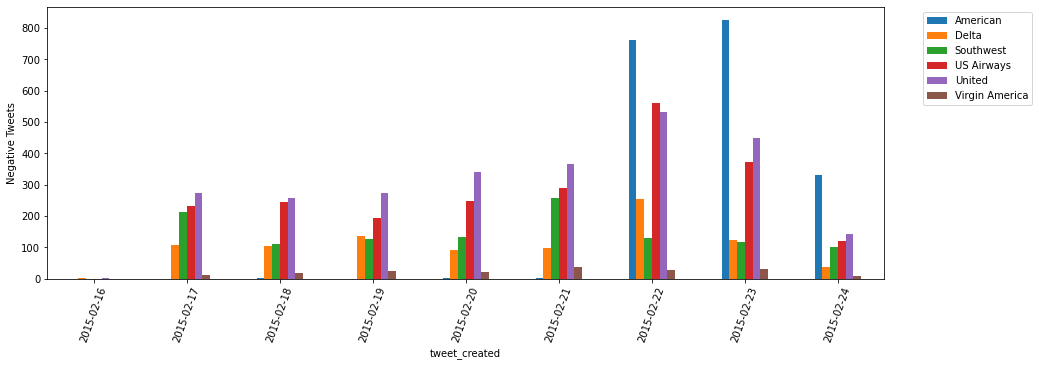

In [31]:
neg_tweet_df = tweet_data.groupby(['tweet_created','airline','airline_sentiment']).size()
neg_tweet_df = neg_tweet_df.loc(axis=0)[:,:,'negative']
ax2 = neg_tweet_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind='bar', figsize = (15,5), rot=70)
ax2.set_ylabel('Negative Tweets')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [32]:

from wordcloud import WordCloud,STOPWORDS
def createWrdCloudForSentiment(sentiment):
    temp_df = tweet_data[tweet_data.airline_sentiment==sentiment]
    words = " ".join(temp_df.text)
    cleaned_words = " ".join([w for w in words.split()
                                  if 'http' not in w
                                    and not w.startswith('@')
                                    and w!='RT'])

    wrdcld = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1500,
                      height=1000).generate(cleaned_words)
    plt.figure(figsize=(10,10))
    plt.imshow(wrdcld)
    plt.axis('off')
    plt.show

💡 Word cloud is a technique for visualising frequent words in a text where the size of the words represents their frequency. So we are going to use it in order to highlight the words most frequently used in the tweets.

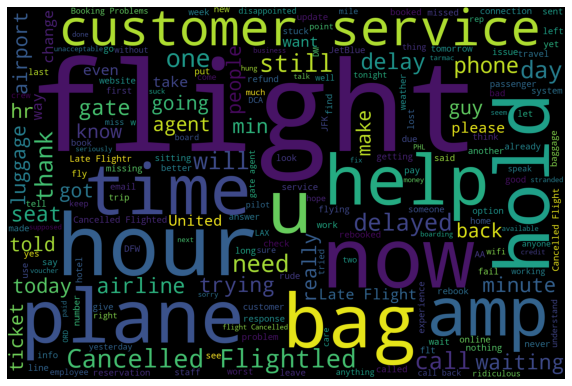

In [33]:
createWrdCloudForSentiment('negative')

we observe that 'flight', 'hour', 'customer service', 'now', 'time' 'hold', 'bag', 'plane' are present more frequently in negative statements.

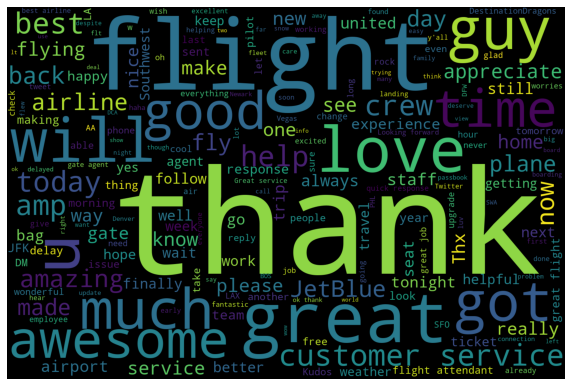

In [34]:
createWrdCloudForSentiment('positive')

we observe that 'thank', 'flight', 'great', 'will', 'awesome' 'love' are present more frequently in positive statements.

**Summary Part 1**

---



*   There are 14640 rows and 15 columns in the tweet data
*   There are 36 duplicate records in the data set
*   Here we can see that United Airlines, US Airways, American Airlines has the most number of negative review
*   Virgin America has the least number of negative reviews
*   Customer service and Late flight seems to be the main reason why customers are giving bad feedback



## <font color='Brown'>Task 2: </font>**Understand of data-columns:**

a. Drop all other columns except “text” and “airline_sentiment”. 

b. Check the shape of data. 

c. Print first 5 rows of data. 

In [35]:
tweet_data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

**Drop Irrelevant columns**

In [36]:
# Let us now remove irrelevant columns
tweet_data_relevant = tweet_data.drop(['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count','tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], axis =1)

**Shape of Data**

In [37]:
# There are 14568 rows and 2 columns (This is result of keeping relevant rows and duplicate data cleanup)
tweet_data_relevant.shape

(14568, 2)

**Printing first 5 rows of data**

In [38]:
tweet_data_relevant.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [39]:
print(tweet_data_relevant.airline_sentiment.value_counts())

negative    9140
neutral     3083
positive    2345
Name: airline_sentiment, dtype: int64


**Is the data balanced ??**

negative    9140
neutral     3083
positive    2345
Name: airline_sentiment, dtype: int64


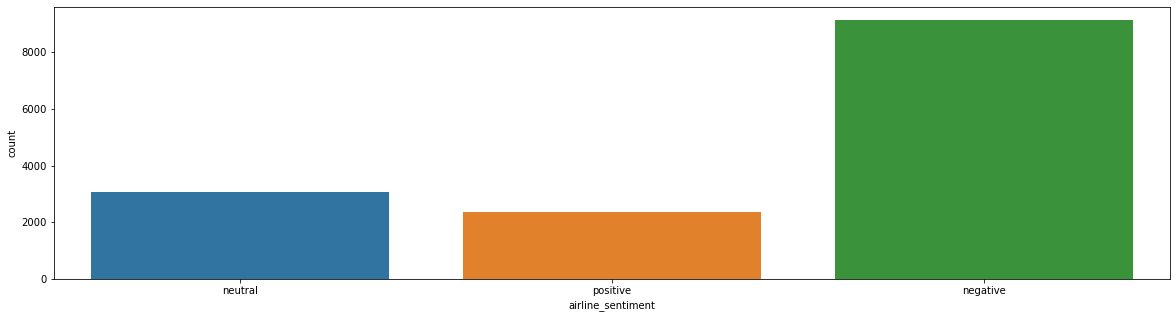

In [40]:
y = tweet_data_relevant['airline_sentiment']
print(y.value_counts())
plt.figure(figsize=(20,5)) 
g = sns.countplot(y)
# No, Here we can see that the data is not balanced, There are lot of negative sentiments

**Summary Part 2**

*   The data are not balanced, The percentage of negative sentiment is high
*   There are 14568 rows in the dataset after duplicate data cleanup

## <font color='brown'>Task 3: </font>Text pre-processing: Data preparation. <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRJT9DkvsiZOMRFuSh4sFsXpxn7P_-4ZtxPAg&usqp=CAU" width=400>
*	a. Html tag removal. 
*	b. Tokenization. 
*	c. Remove the numbers. 
*	d. Removal of Special Characters and Punctuations. 
*	e. Conversion to lowercase. 
*	f. Lemmatize or stemming. 
*	g. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.) 
*	h. Print first 5 rows of data after pre-processing.

**Html tag removal**

In [41]:
def perform_html_cleanup( raw_review ):
  # 1. Remove HTML
  review_text = BeautifulSoup(raw_review).get_text()
  return review_text

**Replace Contraction** : Contractions are shortened version of words or syllables. They often exist in either written or spoken forms in the English language. These shortened versions or contractions of words are created by removing specific letters and sounds.

In [42]:
def replace_contractions(raw_review):
    #Replace contractions in raw_review
    return contractions.fix(raw_review)

**Tokenization** : Tokenizing sentences to break text down into sentences, words, or other units

In [43]:
def perform_tokenization( raw_review ):
  # 2. Perform Tokenization
  word_tokens = word_tokenize(raw_review)  # Tokenization
  return word_tokens

**Removal of Numbers**

In [44]:
def remove_numbers(list_of_words): 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list_of_words] 
    return list

**Remove special characters and punctuations**

In [45]:
def remove_special_character_punctuation(list_of_words): 
    pattern = '[^A-Za-z0-9]+'
    list = [re.sub(pattern, '', i) for i in list_of_words] 
    return list

In [46]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

**Conversion to Lower case**

In [47]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

**Remove empty String**

In [48]:
def remove_empty_string(words):
  return list(filter(None, words))

**Stemming**

In [49]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return stems

**Lemmatization**

In [50]:
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

**Complete Pre-processing**

In [51]:
def perform_cleanup(raw_review):
    clean_review = perform_html_cleanup(raw_review)
    clean_review = replace_contractions(clean_review)
    clean_review = perform_tokenization(clean_review)
    clean_review = remove_numbers(clean_review)
    clean_review = remove_special_character_punctuation(clean_review)
    clean_review = remove_punctuation(clean_review)
    clean_review  = to_lowercase(clean_review)
    clean_review = remove_empty_string(clean_review)
    #clean_review = stem_words(clean_review)
    clean_review = lemmatize_verbs(clean_review)
    return clean_review

In [52]:
print(tweet_data_relevant.head())

  airline_sentiment                                               text
0           neutral                @VirginAmerica What @dhepburn said.
1          positive  @VirginAmerica plus you've added commercials t...
2           neutral  @VirginAmerica I didn't today... Must mean I n...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...


**Join the words in the list to convert back to text string in the dataframe**


(So that each row contains the data in text format.)

In [53]:
clean_reviews = []

for i, row in tweet_data_relevant.iterrows():
    words = tweet_data_relevant.at[i, 'text']
    words = perform_cleanup(words)
    tweet_data_relevant.at[i,'text'] = " ".join( words )
    clean_reviews.append( tweet_data_relevant.at[i, 'text'] )
tweet_data_relevant.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus you have add commercials to...
2,neutral,virginamerica i do not today must mean i need ...
3,negative,virginamerica it be really aggressive to blast...
4,negative,virginamerica and it be a really big bad thing...


**Print first 5 rows of data after pre-processing**

In [54]:
tweet_data_relevant.head(5)

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus you have add commercials to...
2,neutral,virginamerica i do not today must mean i need ...
3,negative,virginamerica it be really aggressive to blast...
4,negative,virginamerica and it be a really big bad thing...


## <font color='brown'> Task 4: </font>**Vectorization**


a. Use CountVectorizer. The idea of CountVectorizer is to tokenize texts and build a vocabulary of known words to encode texts with these vocabularies; An integer count for the number of times each word appeared in the document.

b. Use TfidfVectorizer. Using TF-IDF method which assigns scores to each word based on its frequency, that the more frequent word got higher weights.

**CountVectorizer**

In [55]:
print ("Creating the bag of words...\n")
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
count_vectorizer_data_features = count_vectorizer.fit_transform(clean_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
count_vectorizer_data_features = count_vectorizer_data_features.toarray()

Creating the bag of words...



In [56]:
print (count_vectorizer_data_features.shape)
print(count_vectorizer_data_features)

(14568, 5000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Vocabulary**

In [57]:
# Take a look at the words in the vocabulary
count_vectorizer_vocab = count_vectorizer.get_feature_names()
print (count_vectorizer_vocab)

['aa', 'aacom', 'aadv', 'aadvantage', 'aafail', 'aal', 'aano', 'aarp', 'abandon', 'abc', 'abcnetwork', 'abilities', 'ability', 'able', 'aboard', 'about', 'above', 'abq', 'abroad', 'absolute', 'absolutely', 'absurd', 'abt', 'abuse', 'abysmal', 'ac', 'accept', 'acceptable', 'access', 'accident', 'accidentally', 'accommodate', 'accommodations', 'accomplish', 'accord', 'accordingly', 'account', 'accountability', 'accrue', 'acct', 'accts', 'accurate', 'accuse', 'achieve', 'acknowledge', 'acknowledgement', 'acknowledgment', 'acquire', 'acquisition', 'across', 'act', 'action', 'activate', 'active', 'activitiesprevention', 'actual', 'actually', 'ad', 'adam', 'add', 'addition', 'additional', 'address', 'addtl', 'adjacent', 'admiral', 'admirals', 'admit', 'adopt', 'adore', 'ads', 'adult', 'advance', 'advantage', 'advertise', 'advice', 'advise', 'advisories', 'advisory', 'aerojobmarket', 'affect', 'affiliate', 'afford', 'affordable', 'afraid', 'after', 'afterall', 'afternoon', 'again', 'against',

**Stop words**

In [58]:
count_vectorizer_stop_words = count_vectorizer.get_stop_words()
print (count_vectorizer_stop_words)
# There are no stop words since we are doing sentiment analysis

None


**Sum up the counts of each vocabulary word**

In [59]:
# Sum up the counts of each vocabulary word
dist = np.sum(count_vectorizer_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(count_vectorizer_vocab, dist):
    print (count, tag)

274 aa
3 aacom
2 aadv
10 aadvantage
2 aafail
2 aal
2 aano
3 aarp
3 abandon
8 abc
3 abcnetwork
2 abilities
5 ability
119 able
4 aboard
509 about
18 above
9 abq
2 abroad
22 absolute
30 absolutely
13 absurd
7 abt
3 abuse
6 abysmal
9 ac
32 accept
23 acceptable
39 access
5 accident
4 accidentally
26 accommodate
8 accommodations
4 accomplish
11 accord
4 accordingly
80 account
6 accountability
2 accrue
10 acct
2 accts
10 accurate
2 accuse
3 achieve
4 acknowledge
2 acknowledgement
2 acknowledgment
2 acquire
2 acquisition
16 across
18 act
13 action
2 activate
4 active
2 activitiesprevention
21 actual
86 actually
4 ad
2 adam
126 add
4 addition
17 additional
52 address
3 addtl
2 adjacent
5 admiral
12 admirals
6 admit
6 adopt
2 adore
5 ads
2 adult
14 advance
15 advantage
11 advertise
9 advice
20 advise
2 advisories
24 advisory
2 aerojobmarket
15 affect
3 affiliate
13 afford
3 affordable
2 afraid
467 after
2 afterall
30 afternoon
391 again
6 against
15 age
6 agency
257 agent
155 agents
3 aggravate


**TfidfVectorizer**

In [60]:
# Initialize the "TfidfVectorizer" object
# Convert a collection of raw documents to a matrix of TF-IDF features.
tfidf_vectorizer = TfidfVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000,
                             min_df=5, 
                             max_df=0.7,
                             ngram_range=(1,2)) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
tfidf_vectorizer_data_features = tfidf_vectorizer.fit_transform(clean_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
tfidf_vectorizer_data_features = tfidf_vectorizer_data_features.toarray()

In [61]:
print (tfidf_vectorizer_data_features.shape)
print(tfidf_vectorizer_data_features)

(14568, 5000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Vocabulary**

In [62]:
# Take a look at the words in the vocabulary
tfidf_vectorizer_vocab = tfidf_vectorizer.get_feature_names()
print (tfidf_vectorizer_vocab)

['aa', 'aa be', 'aadvantage', 'able', 'able to', 'about', 'about an', 'about it', 'about my', 'about our', 'about the', 'about this', 'about to', 'about you', 'about your', 'above', 'absolute', 'absolutely', 'absurd', 'accept', 'acceptable', 'access', 'access to', 'accommodate', 'accord', 'accord to', 'account', 'acct', 'accurate', 'across', 'act', 'action', 'actual', 'actually', 'add', 'add my', 'add to', 'additional', 'address', 'admirals', 'admirals club', 'advance', 'advantage', 'advertise', 'advise', 'advisory', 'affect', 'afford', 'after', 'after an', 'after be', 'after hours', 'after land', 'after my', 'after the', 'after wait', 'afternoon', 'again', 'again for', 'again you', 'age', 'agent', 'agent at', 'agent be', 'agents', 'agents at', 'agents be', 'ago', 'ago and', 'ago be', 'ah', 'ahead', 'air', 'aircraft', 'airfare', 'airline', 'airline be', 'airline ever', 'airline have', 'airline in', 'airline that', 'airline to', 'airlines', 'airlines be', 'airplane', 'airport', 'airport

**Stop Words**

In [63]:
tfidf_vectorizer_stop_words = tfidf_vectorizer.get_stop_words()
print (tfidf_vectorizer_stop_words)

None


**Sum up the counts of each vocabulary word**

In [64]:
# Sum up the counts of each vocabulary word
tf_df_dist = np.sum(tfidf_vectorizer_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(tfidf_vectorizer_vocab, tf_df_dist):
    print (count, tag)

52.753859662049294 aa
3.4484416292751607 aa be
2.8880494603318017 aadvantage
24.003785445493424 able
22.2909940086794 able to
86.03541793943302 about
3.4493791778064558 about an
7.44825310123374 about it
10.40192075935261 about my
3.0815546578233164 about our
14.576912723513658 about the
4.404273441199598 about this
6.155866619932775 about to
4.027840803402911 about you
5.728253598072654 about your
5.2686461079357265 above
6.841799351645003 absolute
9.949775323809824 absolutely
3.7615070507199495 absurd
9.471500301617228 accept
6.284801085453696 acceptable
10.613702732240501 access
5.608598951167375 access to
7.22884701492818 accommodate
3.2442965712999676 accord
3.2442965712999676 accord to
18.630761087864865 account
2.958672427943476 acct
2.9994279896399636 accurate
4.73855438600172 across
5.370300297029534 act
4.159038119835424 action
5.679171877235601 actual
20.478379490827887 actually
29.31747928300126 add
4.651728574915392 add my
3.943947207687015 add to
4.774955475905425 additio

## <font color='brown'>Task 5: </font> Fit and evaluate model using both type of vectorization.

**RandomForest Classifier on CountVectorizer**

In [65]:
tweet_data_relevant.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus you have add commercials to...
2,neutral,virginamerica i do not today must mean i need ...
3,negative,virginamerica it be really aggressive to blast...
4,negative,virginamerica and it be a really big bad thing...


**Dividing Data to Train and Test**

In [67]:
x = count_vectorizer_data_features     # Predictor feature columns
y = tweet_data_relevant['airline_sentiment']   # Predicted class

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)  # 1 is just any random seed number

In [68]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10197, 5000)
(10197,)
(4371, 5000)
(4371,)


**Applying SMOTE since EDA shows that the data are not balanced**

In [69]:
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(x_train, y_train)

In [70]:
print(X_train_SMOTE.shape)
print(y_train_SMOTE.shape)

(19266, 5000)
(19266,)


In [71]:
y_train_SMOTE

0        negative
1        negative
2        positive
3        negative
4        negative
           ...   
19261    positive
19262    positive
19263    positive
19264    positive
19265    positive
Name: airline_sentiment, Length: 19266, dtype: object

**Checking if data is balanced after applying SMOTE**

neutral     6422
positive    6422
negative    6422
Name: airline_sentiment, dtype: int64


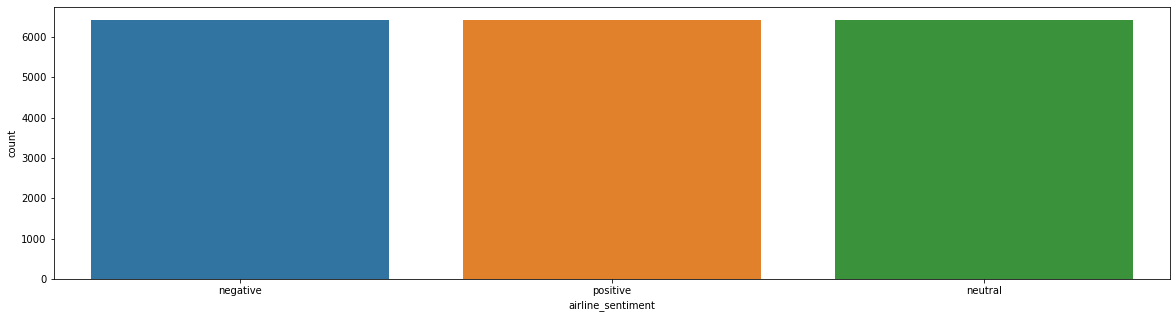

In [72]:
after_smote_airline_sentiment=pd.DataFrame(y_train_SMOTE, columns=['airline_sentiment']) 
y = after_smote_airline_sentiment['airline_sentiment']
print(y.value_counts())
plt.figure(figsize=(20,5)) 
g = sns.countplot(y)
# Here we can see that after applying smote, the data is balanced

**Dividing Test data to Test and Validation Data**

In [73]:
# Dividing the test data into test and validation set in 50-50 ratio
x_validation, x_test_main, y_validation, y_test_main = train_test_split(x_test, y_test, test_size=0.50, random_state=1)

print(x_validation.shape)
print(x_test_main.shape)


print(y_validation.shape)
print(y_test_main.shape)

# There are 2185 samples for validation and 2186 samples for testing

(2185, 5000)
(2186, 5000)
(2185,)
(2186,)


**Initialize RandomForestClassifier**

In [74]:
# Initialize a Random Forest classifier with 100 trees
randomforestclassifier = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False) 
# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable

print ("Training the random forest...")
randomforestclassifier = randomforestclassifier.fit( X_train_SMOTE, y_train_SMOTE)

Training the random forest...


In [75]:
randomforestclassifier.score(X_train_SMOTE, y_train_SMOTE)

0.9387003010484792

**Evaluate score by cross-validation**

In [76]:
print (np.mean(cross_val_score(randomforestclassifier,X_train_SMOTE, y_train_SMOTE,cv=10)))

0.8009560807479221


In [77]:
# Make class predictions for the Validation set
y_validation_predict= randomforestclassifier.predict(x_validation)

**Training and Validation Accuracy**

In [78]:
print("Trainig accuracy",randomforestclassifier.score(X_train_SMOTE,y_train_SMOTE))  
print()
print("Validation accuracy",randomforestclassifier.score(x_validation, y_validation))
print()

Trainig accuracy 0.9387003010484792

Validation accuracy 0.7670480549199085



**Classification Report**  (Validation Set)

In [79]:
print(metrics.classification_report(y_validation,y_validation_predict))

              precision    recall  f1-score   support

    negative       0.82      0.90      0.86      1331
     neutral       0.62      0.52      0.56       467
    positive       0.73      0.61      0.66       387

    accuracy                           0.77      2185
   macro avg       0.72      0.68      0.69      2185
weighted avg       0.76      0.77      0.76      2185



**Confusion Matrix** (Validation Set)

<Figure size 432x288 with 0 Axes>

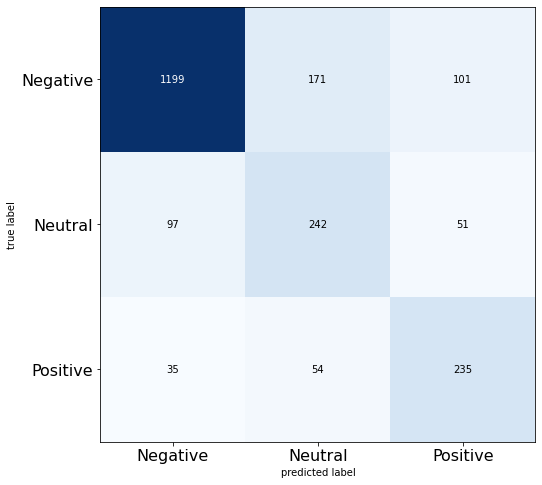

In [80]:
cm=confusion_matrix(y_validation_predict , y_validation)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

**Testing Data Accuracy**

In [81]:
print("Testing accuracy",randomforestclassifier.score(x_test_main, y_test_main))
print()

Testing accuracy 0.7538883806038427



**Classification Report**  (Test Set)

In [82]:
# Make class predictions for the Validation set
y_test_predict= randomforestclassifier.predict(x_test_main)

print(metrics.classification_report(y_test_main,y_test_predict))

              precision    recall  f1-score   support

    negative       0.81      0.89      0.85      1387
     neutral       0.60      0.47      0.53       465
    positive       0.63      0.57      0.60       334

    accuracy                           0.75      2186
   macro avg       0.68      0.65      0.66      2186
weighted avg       0.74      0.75      0.74      2186



**Confusion Matrix** (Test Set)

<Figure size 432x288 with 0 Axes>

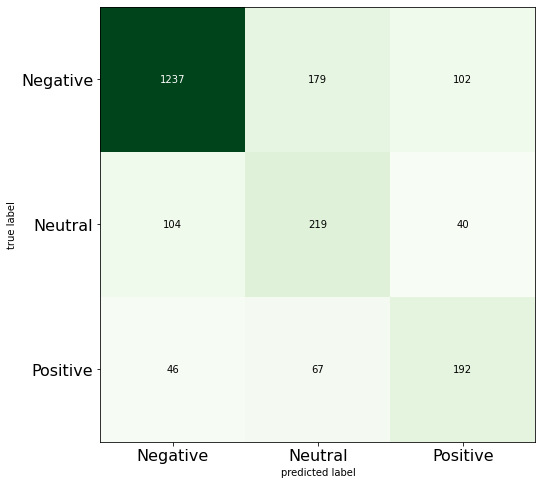

In [83]:
cm=confusion_matrix(y_test_predict , y_test_main)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Greens)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

**Random Forest Classifier on TfidfVectorizer**

**Dividing Data into train and Test**

In [84]:
x_tf_idf = tfidf_vectorizer_data_features     # Predictor feature columns
y_tf_idf = tweet_data_relevant['airline_sentiment']   # Predicted class

x_train_tf_idf, x_test_tf_idf, y_train_tf_idf, y_test_tf_idf = train_test_split(x_tf_idf, y_tf_idf, test_size=0.3, random_state=1)  # 1 is just any random seed number

In [85]:
print(x_train_tf_idf.shape)
print(y_train_tf_idf.shape)
print(x_test_tf_idf.shape)
print(y_test_tf_idf.shape)

(10197, 5000)
(10197,)
(4371, 5000)
(4371,)


**Applying SMOTE since EDA shows that the data are not balanced**

In [87]:
tf_idf_smt = SMOTE(random_state=0)
X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE = smt.fit_sample(x_train_tf_idf, y_train_tf_idf)

In [88]:
print(X_train_tf_idf_SMOTE.shape)
print(y_train_tf_idf_SMOTE.shape)

(19266, 5000)
(19266,)


neutral     6422
positive    6422
negative    6422
Name: airline_sentiment, dtype: int64


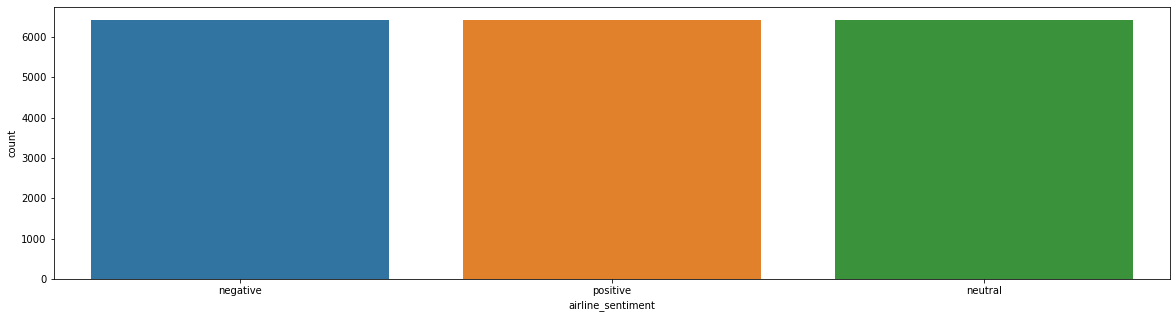

In [89]:
after_smote_airline_sentiment_tf_idf=pd.DataFrame(y_train_tf_idf_SMOTE, columns=['airline_sentiment']) 
y = after_smote_airline_sentiment_tf_idf['airline_sentiment']
print(y.value_counts())
plt.figure(figsize=(20,5))
g = sns.countplot(y)
# Here we can see that after smote , the data is balanced

In [90]:
# Dividing the test data into test and validation set in 50-50 ratio
x_validation_tf_idf, x_test_main_tf_idf, y_validation_tf_idf, y_test_main_tf_idf = train_test_split(x_test_tf_idf, y_test_tf_idf, test_size=0.50, random_state=1)

print(x_validation_tf_idf.shape)
print(x_test_main_tf_idf.shape)


print(y_validation_tf_idf.shape)
print(y_test_main_tf_idf.shape)

# There are 2185 samples for validation and 2186 samples for testing

(2185, 5000)
(2186, 5000)
(2185,)
(2186,)


**Initialize RandomForestClassifier**

In [91]:
# Initialize a Random Forest classifier with 100 trees
randomforestclassifier_tf_idf = RandomForestClassifier(verbose=1,n_jobs=-1,n_estimators = 100) 
# Fit the forest to the training set

print ("Training the random forest...")
randomforestclassifier_tf_idf = randomforestclassifier_tf_idf.fit( X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE)

Training the random forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.6s finished


In [92]:
randomforestclassifier_tf_idf.score(X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished


0.9977680888612063

**Evaluate score by cross-validation**

In [93]:
print (np.mean(cross_val_score(randomforestclassifier_tf_idf,X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE,cv=10)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]:

0.9127052795682064


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [94]:
# Make class predictions for the Validation set
y_validation_predict_tf_idf= randomforestclassifier_tf_idf.predict(x_validation_tf_idf)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


**Training and Validation Accuracy**

In [95]:
print("Trainig accuracy",randomforestclassifier_tf_idf.score(X_train_tf_idf_SMOTE,y_train_tf_idf_SMOTE))  
print()
print("Validation accuracy",randomforestclassifier_tf_idf.score(x_validation_tf_idf, y_validation_tf_idf))
print()

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Trainig accuracy 0.9977680888612063

Validation accuracy 0.7752860411899314



**Classification Report**  (Validation Set)

In [96]:
print(metrics.classification_report(y_validation_tf_idf,y_validation_predict_tf_idf))

              precision    recall  f1-score   support

    negative       0.81      0.92      0.86      1331
     neutral       0.63      0.51      0.56       467
    positive       0.80      0.60      0.69       387

    accuracy                           0.78      2185
   macro avg       0.75      0.68      0.70      2185
weighted avg       0.77      0.78      0.77      2185



**Confusion Matrix** (Validation Set)

<Figure size 432x288 with 0 Axes>

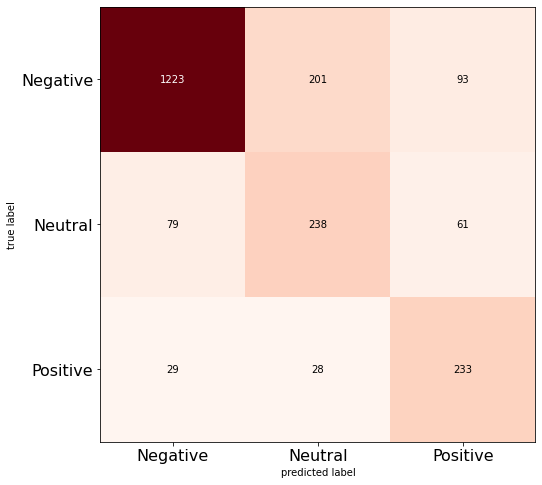

In [97]:
cm=confusion_matrix(y_validation_predict_tf_idf , y_validation_tf_idf)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

**Test Accuracy**

In [98]:
print("Test accuracy",randomforestclassifier_tf_idf.score(x_test_main_tf_idf, y_test_main_tf_idf))
print()

Test accuracy 0.7708142726440989



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


**Classification Report**  (Test Set)

In [99]:
# Make class predictions for the test set
y_test_predict_tf_idf= randomforestclassifier_tf_idf.predict(x_test_main_tf_idf)
print(metrics.classification_report(y_test_main_tf_idf,y_test_predict_tf_idf))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

    negative       0.81      0.91      0.86      1387
     neutral       0.62      0.48      0.54       465
    positive       0.73      0.59      0.65       334

    accuracy                           0.77      2186
   macro avg       0.72      0.66      0.68      2186
weighted avg       0.76      0.77      0.76      2186



[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


**Confusion Matrix** (Test Set)

<Figure size 432x288 with 0 Axes>

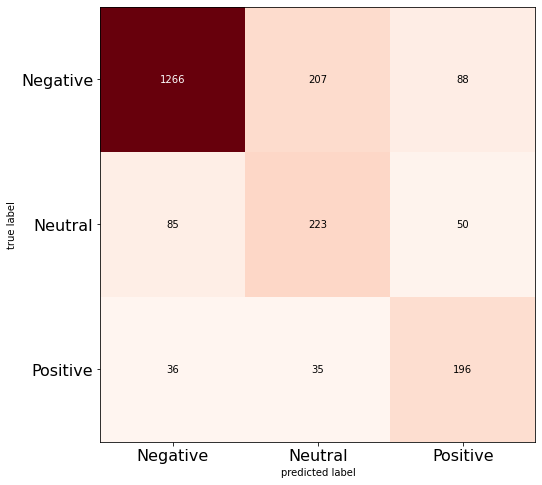

In [100]:
cm=confusion_matrix(y_test_predict_tf_idf , y_test_main_tf_idf)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

## <font color='brown'>Task 6: </font> 


## Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset.


### RESULTS AND DISCUSSIONS
In this proposed work, the dataset contains various tweets based on different airline company services. The “Twitter Airline Sentiment” dataset was downloaded from Kaggle which contains tweets covering six U.S. airline companies with a total number of (14,640) tweets, each of which is labeled according to sentiment polarity as: positive, negative, and neutral.


**Pre-processing steps in NLP**

1. HTML tag cleanup - It returns all the text in a document or beneath a tag, as a single Unicode string:
2. Contraction: 
Contractions are shortened version of words or syllables. 
In case of English contractions are often created by removing one of the vowels from the word. 
Examples would be, do not to don’t and I would to I’d. Converting each contraction to its expanded, original form helps with text standardization.
3. Tokenization: 
Tokenization is a step which splits longer strings of text into smaller pieces, or tokens.<br> 
Larger chunks of text can be tokenized into sentences, sentences can be tokenized into words, etc. 
Further processing is generally performed after a piece of text has been appropriately tokenized.<br> 
Tokenization is also referred to as text segmentation or lexical analysis.<br>
Sometimes segmentation is used to refer to the breakdown of a large chunk of text into pieces larger than words (e.g. paragraphs or sentences), while tokenization is reserved for the breakdown process which results exclusively in words.
4. Removing numbers  - Remove numbers from list of tokenized words
5. Remove special characters - Remove special characters from list of tokenized words
6. Remove punctuation - Remove punctuation from list of tokenized words
7. Convert text to lower case - converting all text to the same case 
8. Remove empty strings- Remove empty string from list of tokenized words
9. Stemming- Converting the words into their base word or stem word ( Ex - tastefully, tasty, these words are converted to stem word called 'tasti'). 
This reduces the vector dimension because we dont consider all similar words<br>
10. Lemmatization - Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

**Techniques for Encoding**

Steps to do after text pre-processing:
Techniques for Encoding - These are the popular techniques that are used for encoding:
- Bag of words(CountVectorization): In BoW we construct a dictionary that contains set of all unique words from our text review dataset. The frequency of the word is counted here. If there are d unique words in our dictionary then for every sentence or review the vector will be of length d and count of word from review is stored at its particular location in vector. The vector will be highly sparse in such case.  <br>    
- Tf-idf(TfIdfVectorization)(Term Frequency - Inverse Document Frequency): Term Frequency - Inverse Document Frequency it makes sure that less importance is given to most frequent words and also considers less frequent words.Term Frequency is number of times a particular word(W) occurs in a review divided by totall number of words (Wr) in review. The term frequency value ranges from 0 to 1.                               
- Inverse Document Frequency is calculated as log(Total Number of Docs(N) / Number of Docs which contains particular word(n)). Here Docs referred as Reviews.
                              TF-IDF is TF * IDF that is (W/Wr)*LOG(N/n)

### **Performance of Classification Model**

**RandomForestClassifier on CountVectorizer**

Trainig accuracy 0.9387003010484792

Testing accuracy 0.7538883806038427

              precision    recall  f1-score   support

    negative       0.81      0.89      0.85      1387
     neutral       0.60      0.47      0.53       465
    positive       0.63      0.57      0.60       334

    accuracy                           0.75      2186
   macro avg       0.68      0.65      0.66      2186
weighted avg       0.74      0.75      0.74      2186



<Figure size 432x288 with 0 Axes>

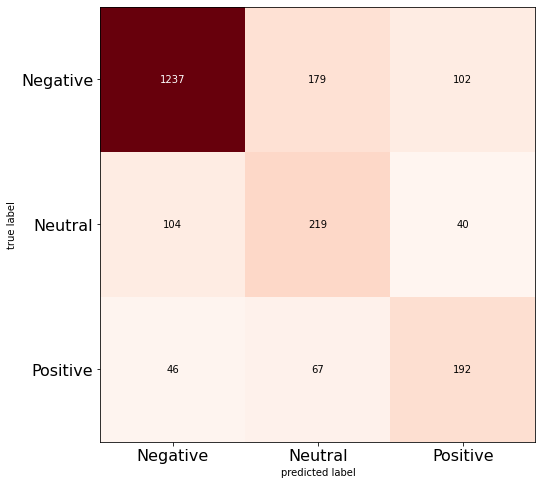

In [101]:
print("Trainig accuracy",randomforestclassifier.score(X_train_SMOTE,y_train_SMOTE))  
print()
print("Testing accuracy",randomforestclassifier.score(x_test_main, y_test_main))
print()

y_test_predict= randomforestclassifier.predict(x_test_main)
print(metrics.classification_report(y_test_main,y_test_predict))

cm=confusion_matrix(y_test_predict , y_test_main)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

**RandomForestClassifier on TfidfVectorizer**

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Trainig accuracy 0.9977680888612063

Test accuracy 0.7708142726440989



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


              precision    recall  f1-score   support

    negative       0.81      0.91      0.86      1387
     neutral       0.62      0.48      0.54       465
    positive       0.73      0.59      0.65       334

    accuracy                           0.77      2186
   macro avg       0.72      0.66      0.68      2186
weighted avg       0.76      0.77      0.76      2186



<Figure size 432x288 with 0 Axes>

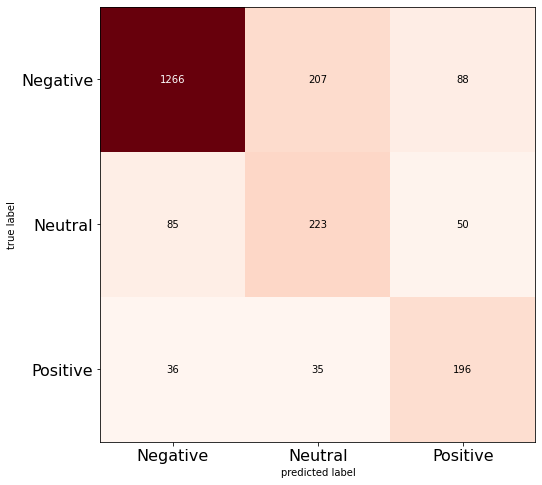

In [102]:
print("Trainig accuracy",randomforestclassifier_tf_idf.score(X_train_tf_idf_SMOTE,y_train_tf_idf_SMOTE))  
print()
print("Test accuracy",randomforestclassifier_tf_idf.score(x_test_main_tf_idf, y_test_main_tf_idf))
print()

# Make class predictions for the test set
y_test_predict_tf_idf= randomforestclassifier_tf_idf.predict(x_test_main_tf_idf)
print(metrics.classification_report(y_test_main_tf_idf,y_test_predict_tf_idf))

cm=confusion_matrix(y_test_predict_tf_idf , y_test_main_tf_idf)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


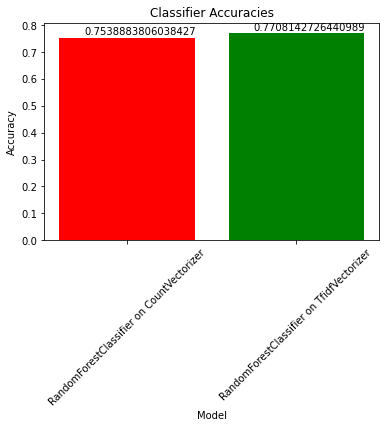

In [103]:
Accuracy=[]
Model=[]
Accuracy.append(randomforestclassifier.score(x_test_main, y_test_main))
Accuracy.append(randomforestclassifier_tf_idf.score(x_test_main_tf_idf, y_test_main_tf_idf))
Model.append("RandomForestClassifier on CountVectorizer")
Model.append("RandomForestClassifier on TfidfVectorizer")


index=[0,1]
plt.bar(index,Accuracy,color='rgbyk')
plt.xticks(index,Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Classifier Accuracies')

xlocs, xlabs = plt.xticks()

for i, v in enumerate(Accuracy):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))

# The RandomForestClassfier on TfidfVectorizer is having better accuracy

**Summary**

---





*   RandomForestClassifier on TfidfVectorizer has an accuracy of 77% whereas 
RandomForestClassifier on CountVectorizer has an accuracy of 75%. This shows that the model using TfidfVectorizer is better.
*   Model is able to predict airline sentiment correctly 77% of the time
*   United Airlines, US Airways, American Airlines has the most number of negative review
*   Virgin America has the least number of negative reviews
*   Customer service and Late flight seems to be the main reason why customers are giving bad feedback




### Proof of Concept - Recommendations

To gauge the validity of our findings from analyzing sentiment and topic for tweets regarding the six airlines in our scope, we compared some of our findings to facts pulled from the US Department of Transportation’s (DOT) Air Traffic Consumer Reports (ATCR). This is a report published monthly that contains various statistics regarding delays, service complaints, and other airline-related data points that compare the various US flying airlines.<BR>
The specific report for February 2015 can be found at https://www.transportation.gov/sites/dot.gov/files/docs/2015AprilATCR1.pdf <br>
and shows quite similar results.<br> 
The volume of complaints about Customer Service Issues, Late and Cancelled Flights and Lost Luggages increased in 2015, and has continued to increase as the industry grows. Also, the cancellation rate may sound small at 1.5% but looking at a market with 9.5 million scheduled domestic flights per year, this means roughly 142,500 flights-worth of passengers are affected throughout the year. 
Airlines should definitely adopt some social media and sentiment/topic analysis strategy if they haven’t already done so.<br>
Using our 2015 Twitter data, we have observed that there is indeed some observable relationship between our analysis insights and the quantitative insights gained by the US DOT and also potentially to performance. A simple implementation of this would be having a real-time engine to flag tweets tagged or related to the airline, tag the sentiment of this tweet with something like Random Forest, and then analyze the topic on negative tweets to forward to specific customer teams to plan the appropriate business action.<BR>
Social media platforms are also strengthening their position as peoples’ primary source of news, social interaction, e-commerce, and much more. Airlines should take advantage of this. Conducting surveys is a decent method to engage customers and collect feedback, but airlines should shift into the spaces where people already are voicing their opinions and concerns, and take advantage of these short messages of 280 characters to immediately plan an improvement plan.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/07/1.8.jpg">